# ini
ini，即Initialize（初始化），是一种简单的配置文件的格式，常用于存储应用程序的配置信息。它由多个section组成，每个节包含多个键值对。

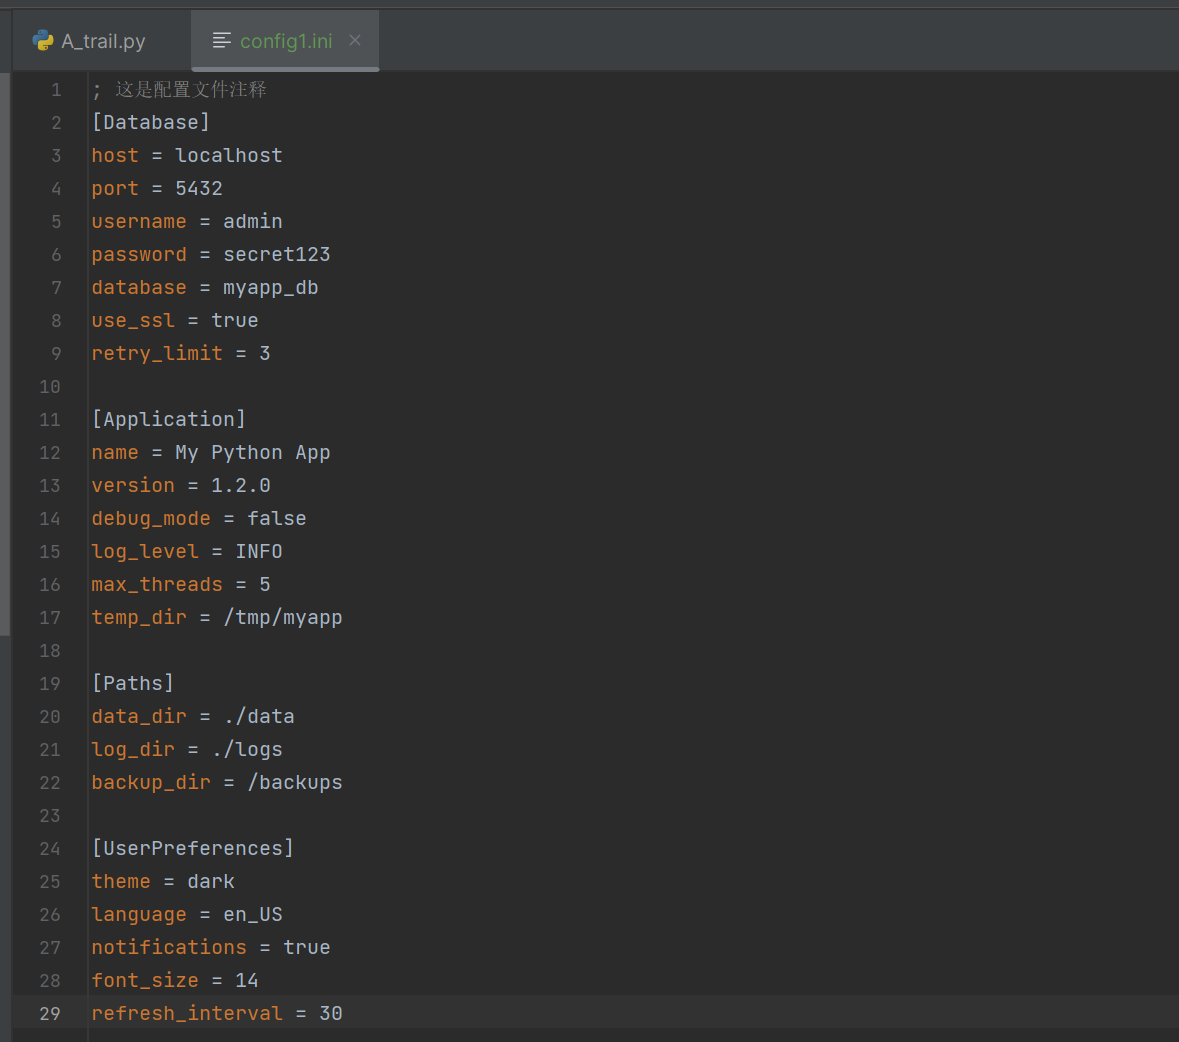

In [3]:
import configparser
import os

# 创建配置解释器
config = configparser.ConfigParser()

# 获取配置文件路径
config_path = './config/config1.ini'

config.read(config_path)

# 验证配置是否成功加载
if not config.sections():
    print('❌错误：配置文件为空或者格式不正确')
    
for section in config.sections():
    print(f"   -{section}")

# 获取数据库配置
db_config = {
    'host': config.get('Database', 'host'),
    'port': config.get('Database', 'port'),
    'username': config.get('Database', 'username'),
    'password': config.get('Database', 'password'),
    'database': config.get('Database', 'database'),
    'use_ssl': config.getboolean('Database', 'use_ssl'),
    'retry_limit': config.getint('Database', 'retry_limit')
}
print(db_config)


   -Database
   -Application
   -Paths
   -UserPreferences
{'host': 'localhost', 'port': '5432', 'username': 'admin', 'password': 'secret123', 'database': 'myapp_db', 'use_ssl': True, 'retry_limit': 3}


# JSON

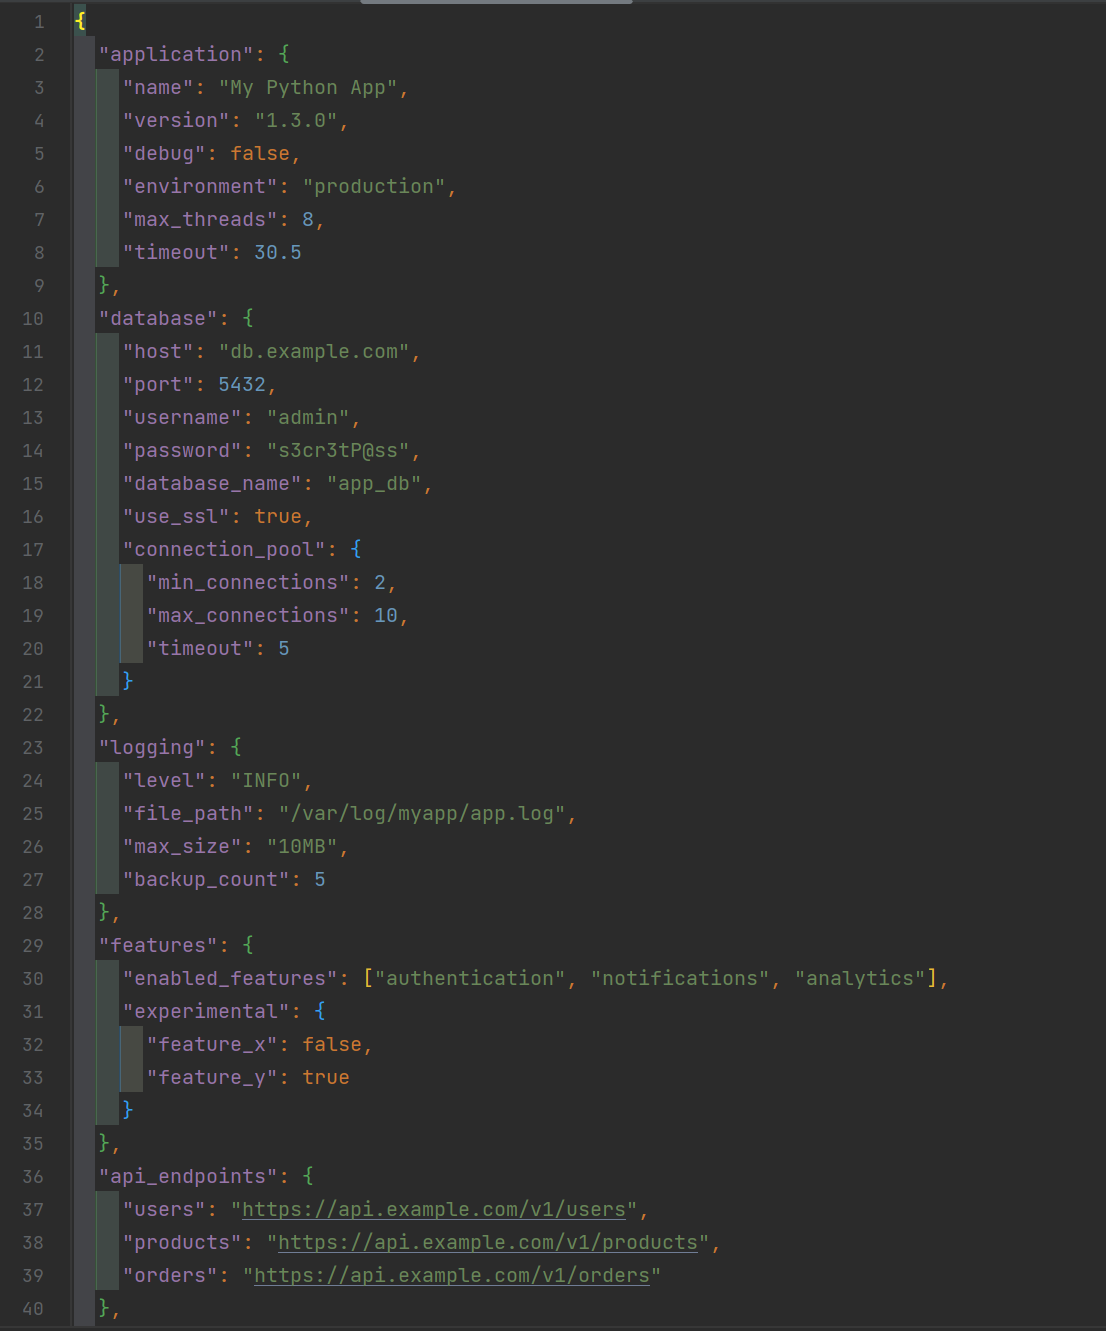

In [5]:
import json

config_path = './config/json_example1.json'

try:
    # 读取并解析JSON文件
    with open(config_path, 'r', encoding='utf-8') as f:
        config = json.load(f)
except json.JSONDecodeError as e:
    print('JSON解析错误：{}'.format(e), file=sys.stderr)
except Exception as e:
    print('读取配置文件时出错：{}'.format(e), file=sys.stderr)
    
print(type(config))



<class 'dict'>


In [7]:
import json

# 要保存的数据（Python 字典）
data = {
    "application": {
        "name": "My Python App",
        "version": "1.4.0",
        "debug": False,
        "max_threads": 8
    },
    "database": {
        "host": "db.example.com",
        "port": 5432,
        "username": "admin"
    },
    "features": ["authentication", "notifications", "analytics"]
}

# 保存 JSON 文件
def save_json_basic(data, filename):
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(data, f, indent=4)
        print(f"✅ JSON 文件已保存到 {filename}")
        return True
    except Exception as e:
        print(f"❌ 保存 JSON 文件时出错: {e}")
        return False

# 使用示例
save_json_basic(data, "./config/config_basic.json")

✅ JSON 文件已保存到 ./config/config_basic.json


True

# YAML

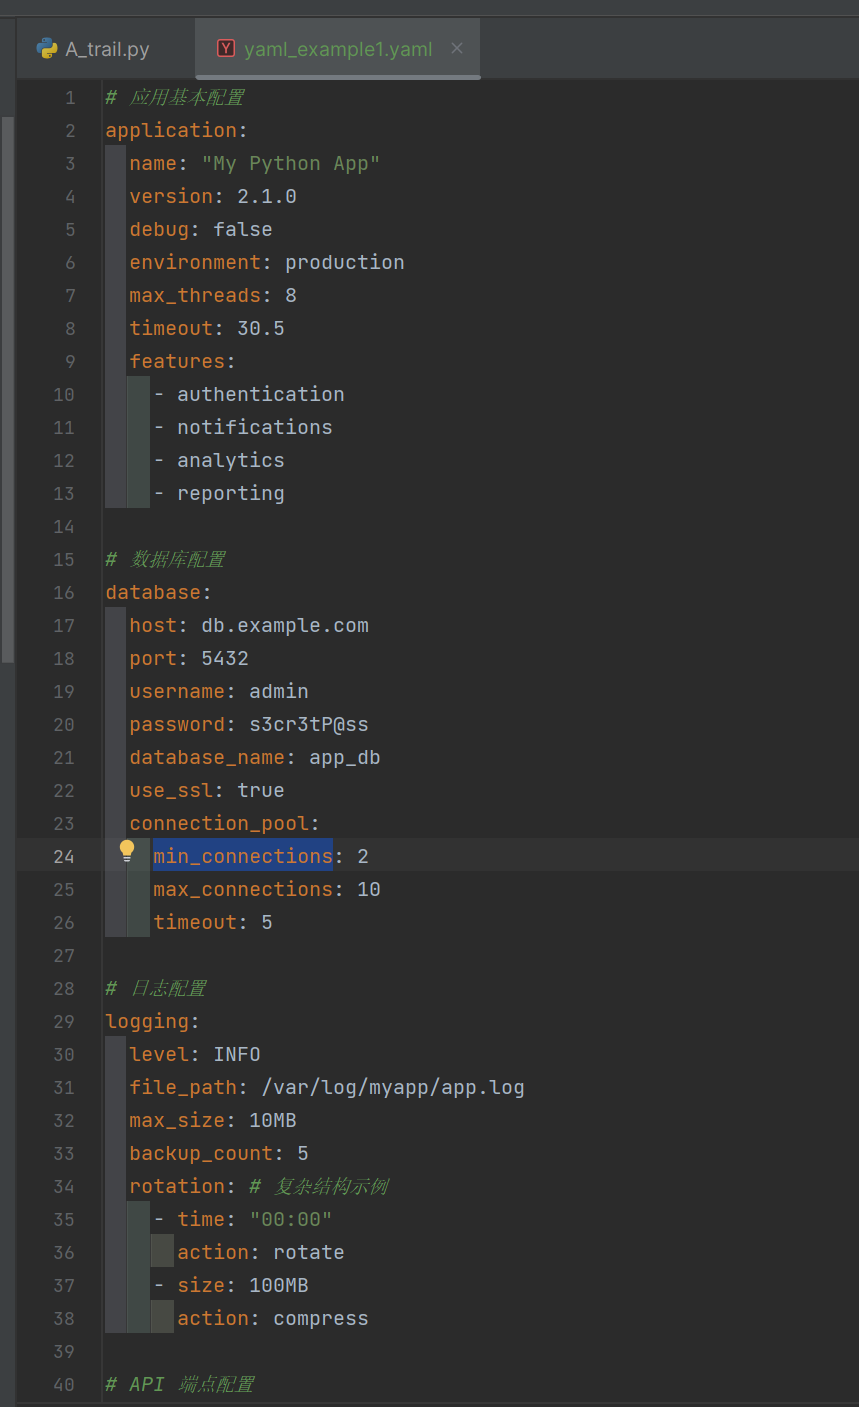

In [12]:
import yaml

path = './config/yaml_example1.yaml'

# 利用safe_load方法返回一个对象
with open(path, 'r', encoding='utf-8') as f:
    config = yaml.safe_load(f)

print(type(config))
print(config)

<class 'dict'>
{'application': {'name': 'My Python App', 'version': '2.1.0', 'debug': False, 'environment': 'production', 'max_threads': 8, 'timeout': 30.5, 'features': ['authentication', 'notifications', 'analytics', 'reporting']}, 'database': {'host': 'db.example.com', 'port': 5432, 'username': 'admin', 'password': 's3cr3tP@ss', 'database_name': 'app_db', 'use_ssl': True, 'connection_pool': {'min_connections': 2, 'max_connections': 10, 'timeout': 5}}, 'logging': {'level': 'INFO', 'file_path': '/var/log/myapp/app.log', 'max_size': '10MB', 'backup_count': 5, 'rotation': [{'time': '00:00', 'action': 'rotate'}, {'size': '100MB', 'action': 'compress'}]}, 'api_endpoints': {'users': 'https://api.example.com/v1/users', 'products': 'https://api.example.com/v1/products', 'orders': 'https://api.example.com/v1/orders'}, 'user_preferences': {'default_theme': 'dark', 'language': 'en-US', 'notifications': {'email': True, 'push': True, 'sms': False}, 'refresh_interval': 300}, 'network': {'whiteliste

In [18]:
# 利用load_all方法生成一个迭代器，包含几块yaml文档
file = open('./config/yaml_example2.yaml', 'r', encoding='utf-8')
y = yaml.load_all(file, Loader=yaml.FullLoader)
print(type(y))

for data in y:
    print('=======================\n')
    print(data)

<class 'generator'>

{'common': {'log_level': 'INFO', 'timeout': 30}}

{'development': {'debug': True}}

{'production': {'debug': False}}


In [19]:
import yaml

dic1 = {'name': 'haibo', 'age': 19}
dic2 = {'name': 'huimin', 'age': 20}
with open ('./config/yaml_example3.yaml', 'w') as f:
    yaml.dump_all([dic1, dic2], f)